In [6]:
from util import *
from generation import *
from swarm import *
from metrics import *
import random
import time
from IPython import display
import pylab as pl
from multiprocess.pool import ThreadPool


In [7]:
import yal

#modules = yal.read('./yal_files/ami33.yal')

modules = yal.read('./yal_files/ami49.yal')

participants = yal.util.as_participants(modules)

# For ami49 : Filter out Connection with zero emphasis

for participant in participants[:-1]:

    participant['connections'] = {x:y for x,y in participant['connections'].items() if y}

#participants

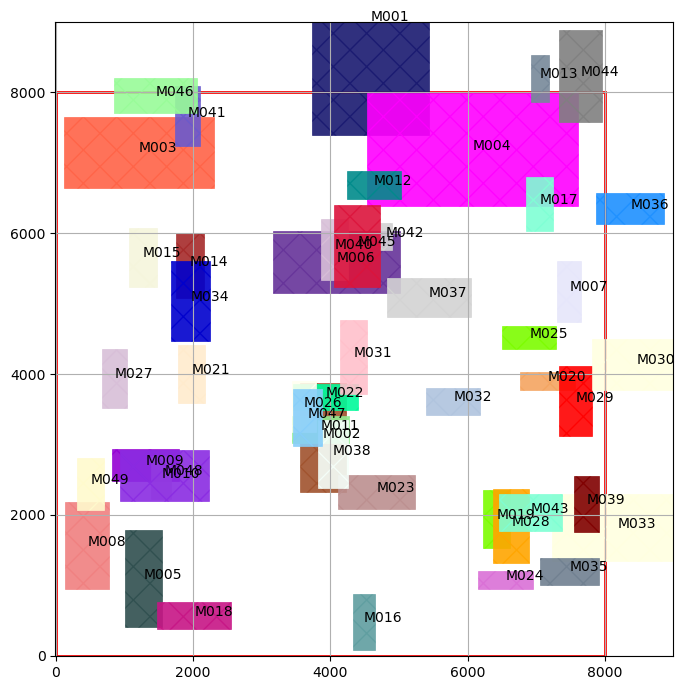

In [8]:
layout_zone = {"xmin"   : 0,
               "ymin"   : 0,
               "width"  : 8000,
               "height" : 8000}

conciliation_quota  = 0.5

critical_amount     = 100

p   = random_place_mcnc(participants, layout_zone, 666)

a = plot_participants(layout_zone, p, 9000, 9000)

In [9]:
participants            = determine_initial_conditions(p, layout_zone, conciliation_quota, critical_amount)


In [10]:
my_cool_pool = ThreadPool(2)

with my_cool_pool as mcp:

    for i in range(500):

        participants, runtime    = one_round_of_interaction(participants, layout_zone, 'interference', conciliation_quota, critical_amount, mcp)

        plot_participants(layout_zone, participants, 9000, 9000)

        print('One Round of Interaction took: ' + str(runtime) + ' seconds')


        last_moves = {key : value['last-move'] for key,value in participants.items()}

        moves = list(last_moves.values())

        #print(last_moves)

        if moves.count('linger') == len(participants):

            ds = calculate_dead_space(participants, layout_zone)  

            print('Current deadspace : ' + str(ds) + ' %') 

            if ds < 25:
                break

            else:
                layout_zone         = scale_layout_zone(layout_zone, 0.99) 

                participants        = reset_after_tightening(participants)

    
    print(str(i) + ' rounds completed!')

KeyboardInterrupt: 